In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential, Model

In [7]:
from tensorflow.keras.datasets.mnist import load_data

In [101]:
(X_train, y_train), (X_test, _) = load_data()

In [102]:
X_train.shape

(60000, 28, 28)

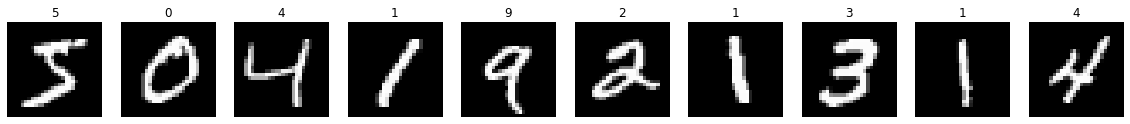

In [103]:
num = 10
fig, ax = plt.subplots(1, num, figsize=(20,5))
for i in range(num):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(y_train[i])
plt.show()

In [104]:
X_train_proc = X_train.reshape(X_train.shape[0],-1) / 255 - 0.5
X_test_proc = X_train.reshape(X_test.shape[0],-1) / 255 - 0.5

In [106]:
encoder = Sequential()
encoder.add(L.InputLayer(28*28))
encoder.add(L.Dense(28*28))
encoder.add(L.Dense(64))
encoder.add(L.Dense(32))

In [107]:
decoder = Sequential()
decoder.add(L.InputLayer((32,)))
decoder.add(L.Dense(32))
decoder.add(L.Dense(64))
decoder.add(L.Dense(28*28))

In [108]:
inp = L.Input(28*28)
code = encoder(inp)
reconstruction = decoder(code)
model = Model(inputs=inp, outputs=reconstruction)

In [109]:
model.compile(optimizer='adamax', loss='mse')

In [120]:
model.fit(X_train_proc, X_train_proc, epochs=15, verbose=0)

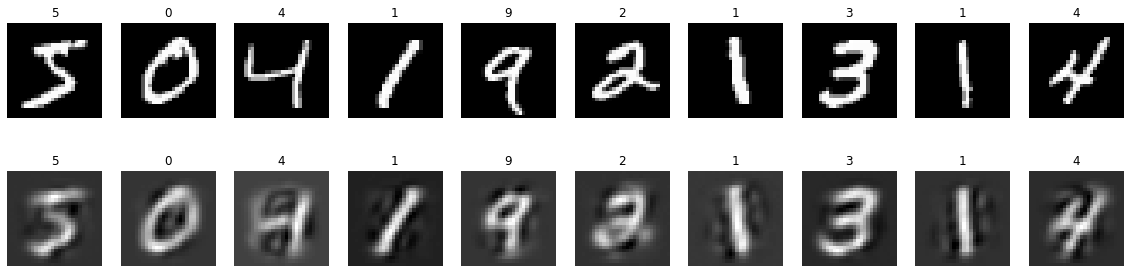

In [121]:
num = 10
fig, ax = plt.subplots(2, num, figsize=(20,5))
for i in range(num):
    ax[0][i].imshow(X_train_proc[i].reshape(28,28), cmap='gray')
    ax[0][i].axis('off')
    ax[0][i].set_title(y_train[i])
    ax[1][i].imshow(model.predict(X_train_proc[i].reshape(1,-1)).reshape(28,28), cmap='gray')
    ax[1][i].axis('off')
    ax[1][i].set_title(y_train[i])
plt.show()